## Auto-Arima Model Prediction of Stocks (Closing Price)

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.5 MB/s 
     |████████████████████████████████| 9.8 MB 34.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Quote-Equity-NTPC-EQ-01-01-2020-to-01-01-2022.csv to Quote-Equity-NTPC-EQ-01-01-2020-to-01-01-2022.csv


In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Quote-Equity-NTPC-EQ-01-01-2020-to-01-01-2022.csv']),index_col=0,parse_dates=True)
df=df.drop(['series ', 'VOLUME ','No of trades ','VALUE '], axis=1)
df=df.iloc[::-1]
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (500, 9)


,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
Date,,,,,,,,,
2020-01-01,119.05,122.00,118.25,119.05,121.50,121.55,120.67,160.8,109.70
2020-01-02,121.50,122.15,120.60,121.55,121.00,121.40,121.54,160.8,109.70
2020-01-03,121.00,121.35,119.10,121.40,119.25,119.35,120.14,160.8,109.70
2020-01-06,119.00,119.15,116.50,119.35,118.90,118.90,118.16,160.8,109.70
2020-01-07,119.25,121.55,119.25,118.90,120.75,120.55,120.43,160.8,109.70
...,...,...,...,...,...,...,...,...,...
2021-12-27,121.25,122.15,120.60,121.25,121.95,121.85,121.57,152.1,88.15
2021-12-28,122.00,124.60,121.95,121.85,124.60,124.10,123.41,152.1,88.15
2021-12-29,124.60,124.75,122.20,124.10,122.60,123.15,123.59,152.1,88.15


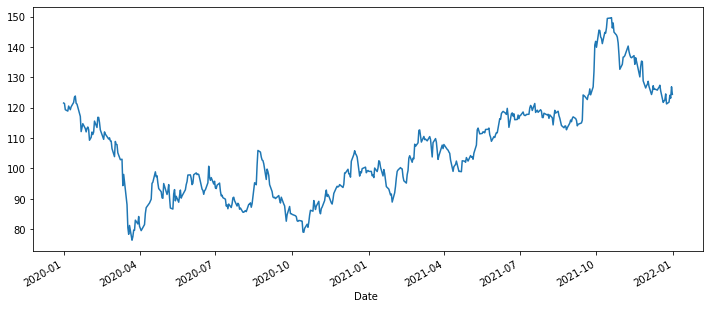

In [5]:
df['close '].plot(figsize=(12,5))

In [6]:
# Check for Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)



In [7]:
ad_test(df['close '])

1. ADF :  -1.4200494932566452
2. P-Value :  0.5726272957206263
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 493
5. Critical Values :
	 1% :  -3.4436840273842058
	 5% :  -2.8674204319994674
	 10% :  -2.5699020441557052


In [8]:
# if(p-value<0.05)==> Stationarity is followed
# If p< 0.05 ; Data is stationary
# if p>0.05; Data is not stationary

from pmdarima import auto_arima
stepwise_fit = auto_arima(df['close '], trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,suppress_warnings=True,stepwise=False,seasonal=False)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2185.149, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2186.636, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2188.631, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2190.462, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2191.366, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2190.427, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.963 seconds


In [9]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1090.575
Date:                Fri, 04 Mar 2022   AIC                           2185.149
Time:                        05:51:24   BIC                           2193.574
Sample:                             0   HQIC                          2188.455
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0057      0.097      0.059      0.953      -0.184       0.195
sigma2         4.6328      0.213     21.711      0.000       4.215       5.051
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                68.99
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.14
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# # print(df.iloc[0:-23])
# print(df[-23:])
print(df.shape)
train=df.iloc[:-23]
test=df.iloc[-23:]
print(train.shape,test.shape)
print("Training data=",(train.shape[0]/df.shape[0])*100)
print("Testing data=",(test.shape[0]/df.shape[0])*100)

(500, 9)
(477, 9) (23, 9)
Training data= 95.39999999999999
Testing data= 4.6


In [11]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.arima.model as stats

In [12]:
model = stats.ARIMA(train['close '], order=(0, 1, 0),trend="t")
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 close    No. Observations:                  477
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1043.372
Date:                Fri, 04 Mar 2022   AIC                           2090.744
Time:                        05:51:24   BIC                           2099.074
Sample:                             0   HQIC                          2094.019
                                - 477                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0120      0.100      0.120      0.904      -0.183       0.207
sigma2         4.6928      0.220     21.300      0.000       4.261       5.125
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):                68.57
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.15
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


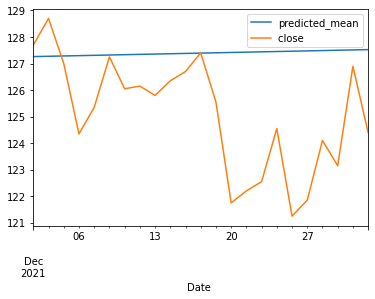

In [13]:
start=len(train)
end=len(train)+len(test)-1
end
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
pred.plot(legend=True)
test['close '].plot(legend=True)

In [14]:
# To calculate the error in model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['close ']))
print(rmse)

3.148418523061275


In [15]:
test['close '].mean()

125.08913043478262

In [16]:
# Now since the rmse is far different from the mean of testing set we go ahead and predict the future values
model2 = stats.ARIMA(df['close '], order=(0, 1, 0),trend="t")
model2=model2.fit()
model2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 close    No. Observations:                  500
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1090.575
Date:                Fri, 04 Mar 2022   AIC                           2185.149
Time:                        05:51:24   BIC                           2193.574
Sample:                             0   HQIC                          2188.455
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0057      0.097      0.059      0.953      -0.184       0.195
sigma2         4.6328      0.213     21.711      0.000       4.215       5.051
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                68.99
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.14
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# For future sets
df.tail()
index_future = pd.date_range(start='2021-12-31',end='2022-01-31')
pred = model2.predict(start=len(df),end=len(df)+31,typ='levels').rename("Future ARIMA Predictions")
# print(pred)
pred.index=index_future
print(pred)


2021-12-31    124.405706
2022-01-01    124.411413
2022-01-02    124.417119
2022-01-03    124.422826
2022-01-04    124.428532
2022-01-05    124.434239
2022-01-06    124.439945
2022-01-07    124.445651
2022-01-08    124.451358
2022-01-09    124.457064
2022-01-10    124.462771
2022-01-11    124.468477
2022-01-12    124.474183
2022-01-13    124.479890
2022-01-14    124.485596
2022-01-15    124.491303
2022-01-16    124.497009
2022-01-17    124.502716
2022-01-18    124.508422
2022-01-19    124.514128
2022-01-20    124.519835
2022-01-21    124.525541
2022-01-22    124.531248
2022-01-23    124.536954
2022-01-24    124.542661
2022-01-25    124.548367
2022-01-26    124.554073
2022-01-27    124.559780
2022-01-28    124.565486
2022-01-29    124.571193
2022-01-30    124.576899
2022-01-31    124.582606
Freq: D, Name: Future ARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


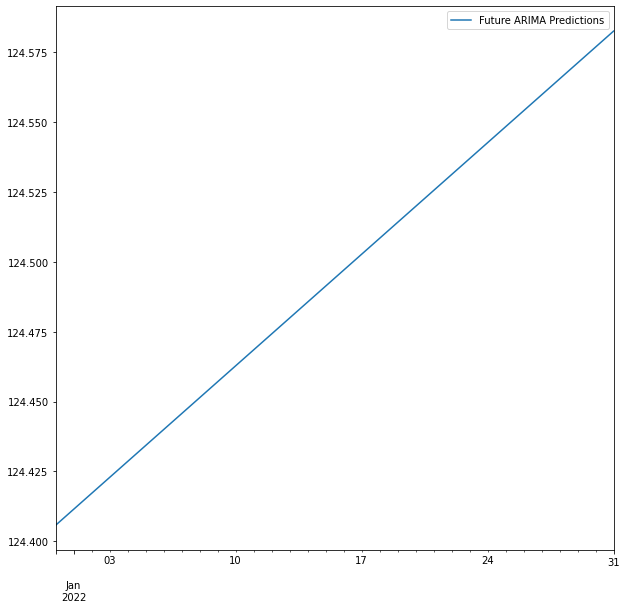

In [18]:
pred.plot(figsize=(10,10),legend='True')

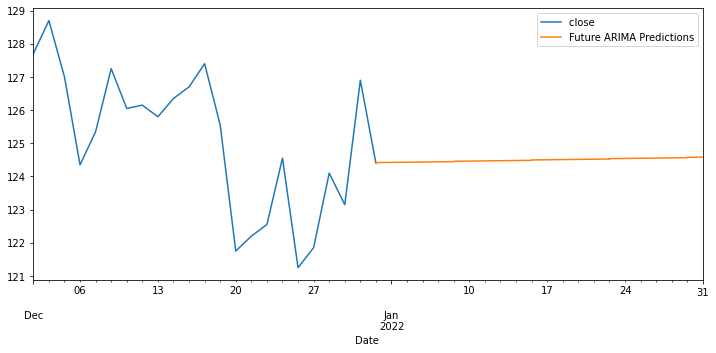

In [19]:
df1 = df.iloc[-23:]
df1['close '].plot(figsize=(12,5),legend="True")
pred.plot(figsize=(12,5),legend='True')

In [20]:
actual = test['close '].values
forecast = (pred.values[1:len(test['close '])+1])
APE = []
for day in range(len(actual)):
	per_err = (actual[day] - forecast[day]) / actual[day]
	per_err = abs(per_err)
	APE.append(per_err)
MAPE = sum(APE)/len(APE)
print(f'''
MAPE : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')
# Since the value of MAPE % is less than 3% therefore the prediction model is 
#accurate


MAPE : 0.02
MAPE % : 1.53 %

